## TAXI

In [2]:
import gym
import plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import time

In [3]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title(" Step: %d %s" % (step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [4]:
env = gym.make("Taxi-v2").env
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## Q-Learning

In [8]:
%%latex
Policy evaluation Q-learning 
Policy improvement $\epsilon$-greedy
$$
Q\left(s_{t}, a_{t}\right) \leftarrow Q\left(s_{t}, a_{t}\right)\left(1-\alpha_{t}\left(s_{t}, a_{t}\right)\right)+\alpha_{t}\left(s_{t}, a_{t}\right)\left[R_{t+1}+\gamma \max _{a_{t+1}} Q\left(s_{t+1}, a_{t+1}\right)\right]
$$

<IPython.core.display.Latex object>

In [4]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

import random
from IPython.display import clear_output

# Hyperparameters
alpha, alpha_in = 0.7, 0.7
gamma = 0.6
epsilon, epsilon_in = 0.5, 0.5
episodes = 10000

# For plotting metrics
all_epochs = []
all_penalties = []

stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(episodes),
        episode_rewards=np.zeros(episodes))

for i in range(1, episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        
    if i % 1000 == 0:
        alpha *= alpha_in
        epsilon *= epsilon_in
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        

print("Training finished.\n")

Episode: 9900
Alpha: 0.028247524899999984
epsilon: 0.0009765625
gamma: 0.6
Training finished.



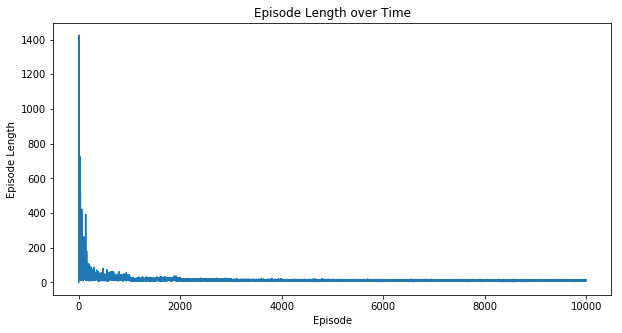

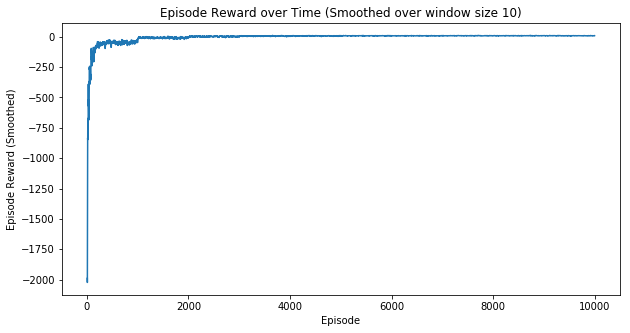

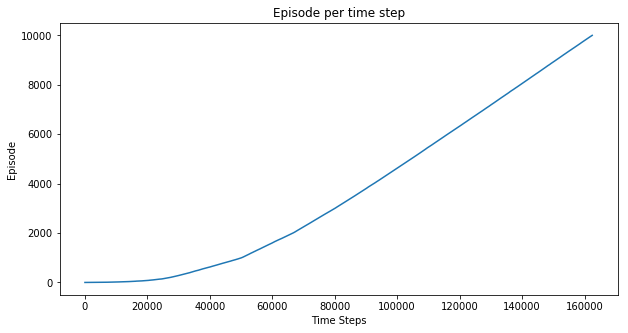

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [5]:
plotting.plot_episode_stats(stats)

In [9]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    
    done = False
    
    while not done:
        if _ == 0:
            env.render()
            time.sleep(1)
            display.clear_output(wait=True)
                 
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    clear_output(wait=True)
    print(f"Episode: {_}")
    
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Episode: 99
Results after 100 episodes:
Average timesteps per episode: 12.53
Average penalties per episode: 0.0


Q-learning is one of the easiest Reinforcement Learning algorithms. The problem with Q-Learning however is, once the number of states in the environment are very high, it becomes difficult to implement them with Q table as the size would become very, very large. State of the art techniques uses Deep neural networks instead of the Q-table (Deep Reinforcement Learning). The neural network takes in state information and actions to the input layer and learns to output the right action over the time. Deep learning techniques (like Convolutional Neural Networks) are also used to interpret the pixels on the screen and extract information out of the game (like scores), and then letting the agent control the game.

## SARSA

In [7]:
%%latex
Policy evaluation Sarsa, $$Q ≈ q_{\pi}$$
Policy improvement $\epsilon$-greedy
$$
Q\left(s_{t}, a_{t}\right) \leftarrow Q\left(s_{t}, a_{t}\right)+\alpha\left[r_{t}+\gamma Q\left(s_{t+1}, a_{t+1}\right)-Q\left(s_{t}, a_{t}\right)\right]
$$

<IPython.core.display.Latex object>

In [10]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
e_table = np.zeros([env.observation_space.n, env.action_space.n]) 

import random
from IPython.display import clear_output

# Hyperparameters
alpha, alpha_in = 0.3, 0.3
gamma, gamma_in = 0.99, 0.99
epsilon, epsilon_in = 0.4, 0.4
lamda = 0.5
episodes = 50000


# For plotting metrics
all_epochs = []
all_penalties = []

stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(episodes),
        episode_rewards=np.zeros(episodes))

for i in range(1, episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample() # Explore action space
    else:
        action = np.argmax(q_table[state]) # Exploit learned values
    
    while not done:

        next_state, reward, done, info = env.step(action)
        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs
        
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample() # Explore action space
        else:
            next_action = np.argmax(q_table[next_state]) # Exploit learned values      
        
        e_table[state, action] += 1
        old_value = q_table[state, action]
        new_value = q_table[next_state, next_action]
        
        td_error = (reward + gamma * new_value) - old_value
        q_table = q_table + alpha*td_error*e_table
        e_table = e_table*gamma*lamda
        

        if reward == -10:
            penalties += 1
        
        action = next_action
        state = next_state
        epochs += 1
        
    if i % 10 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        
    if i % 10000 == 0:
        if alpha > 0.005:
            alpha *= alpha_in
        if epsilon > 0.05:
            epsilon *= epsilon_in
        
    if i % 20000 == 0:
        gamma *= gamma_in
    
print("Training finished.\n")

Episode: 49990
Alpha: 0.00243
epsilon: 0.025600000000000008
gamma: 0.9702989999999999
Training finished.



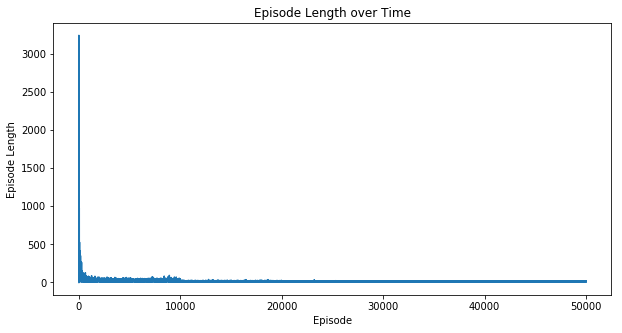

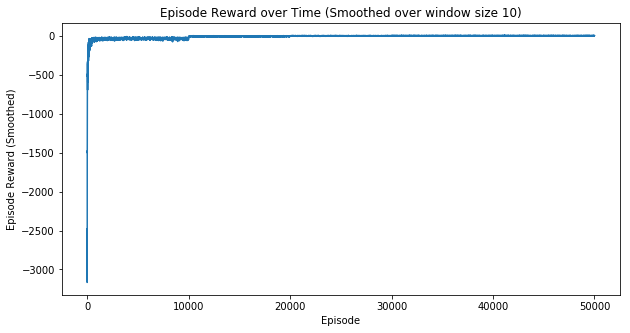

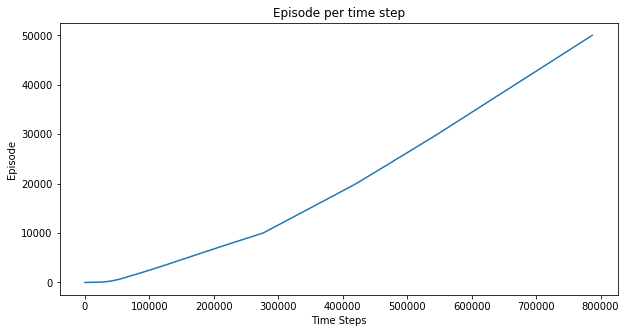

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [11]:
plotting.plot_episode_stats(stats)

In [12]:
"""Evaluate agent's performance after SARSA"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        if _ == 0:
            env.render()
            time.sleep(1)
            display.clear_output(wait=True)
        
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    clear_output(wait=True)
    print(f"Episode: {_}")
    
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Episode: 99
Results after 100 episodes:
Average timesteps per episode: 12.68
Average penalties per episode: 0.0


## Frozen-Lake

In [13]:
env = gym.make("FrozenLake8x8-v0").env
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


## Q-Learning

In [23]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

import random
from IPython.display import clear_output

# Hyperparameters
alpha, alpha_in = 0.5, 0.5
gamma = 0.97
epsilon, epsilon_in = 0.9, 0.9
episodes = 300000

# For plotting metrics
all_epochs = []
all_penalties = []

stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(episodes),
        episode_rewards=np.zeros(episodes))

for i in range(1, episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        
    if i % 5000 == 0:
        if alpha > 0.005:
            alpha *= alpha_in
        if epsilon > 0.1:
            epsilon *= epsilon_in
        

print("Training finished.\n")

Episode: 299900
Alpha: 0.00390625
epsilon: 0.0984770902183612
gamma: 0.97
Training finished.



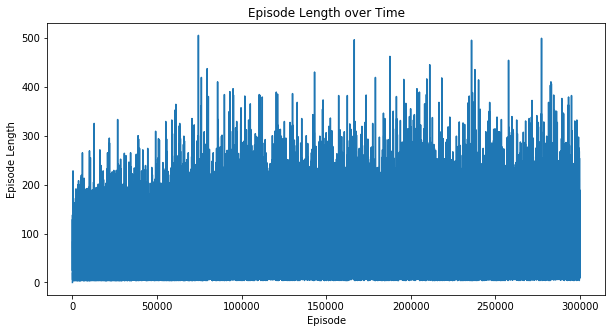

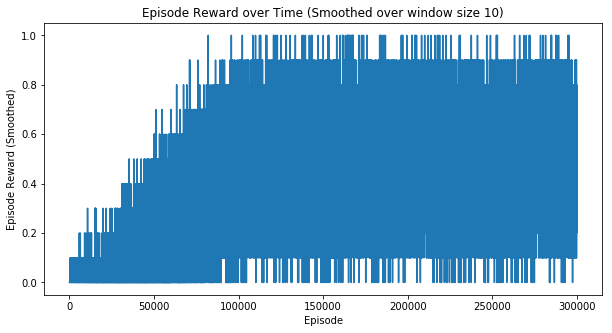

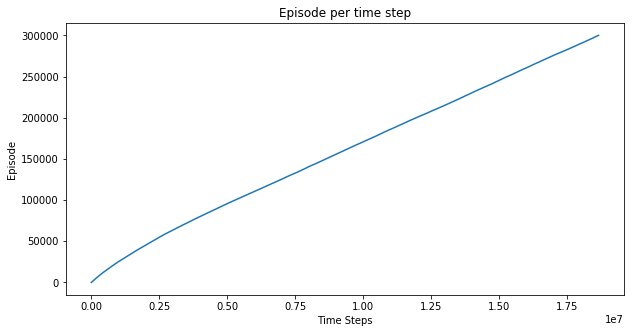

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [24]:
plotting.plot_episode_stats(stats)

In [25]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

total_reward = 0

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    
    done = False
    
    while not done:
        if _ < 2:
            env.render()
            time.sleep(0.3)
            display.clear_output(wait=True)

        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        total_reward += reward

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    clear_output(wait=True)
    print(f"Episode: {_}")
    
print(f"Results after {episodes} episodes:")
print(f"Percent of successful paths: {(total_reward / episodes) * 100}")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Episode: 99
Results after 100 episodes:
Percent of successful paths: 84.0
Average timesteps per episode: 75.55
Average penalties per episode: 0.0


## SARSA

In [78]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
e_table = np.zeros([env.observation_space.n, env.action_space.n]) 

import random
from IPython.display import clear_output

# Hyperparameters
alpha, alpha_in = 0.5, 0.5
gamma = 0.95
epsilon, epsilon_in = 0.9, 0.9
episodes = 50000
lamda = 0.9

# For plotting metrics
all_epochs = []
all_penalties = []

stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(episodes),
        episode_rewards=np.zeros(episodes))

for i in range(1, episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample() # Explore action space
    else:
        action = np.argmax(q_table[state]) # Exploit learned values
    
    while not done:

        next_state, reward, done, info = env.step(action)
        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs
        
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample() # Explore action space
        else:
            next_action = np.argmax(q_table[next_state]) # Exploit learned values      
        
        e_table[state, action] += 1
        old_value = q_table[state, action]
        new_value = q_table[next_state, next_action]
        
        td_error = (reward + gamma * new_value) - old_value
        q_table = q_table + alpha*td_error*e_table
        e_table = e_table*gamma*lamda
        
        action = next_action
        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        
    if i % 5000 == 0:
        if alpha > 0.005:
            alpha *= alpha_in
        if epsilon > 0.1:
            epsilon *= epsilon_in
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
    
print("Training finished.\n")

Episode: 49900
Alpha: 0.00390625
epsilon: 0.34867844010000015
gamma: 1
Training finished.



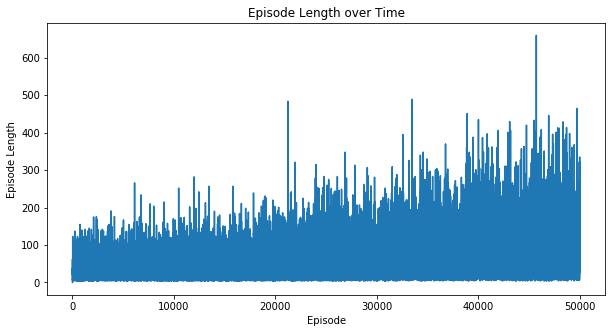

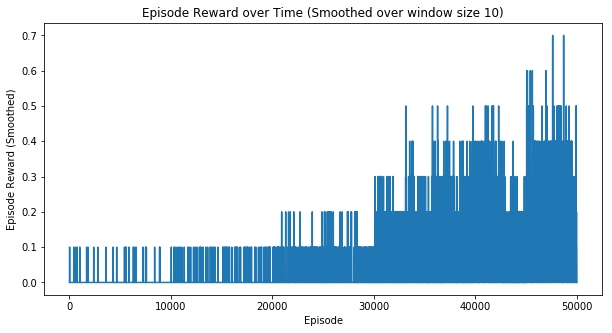

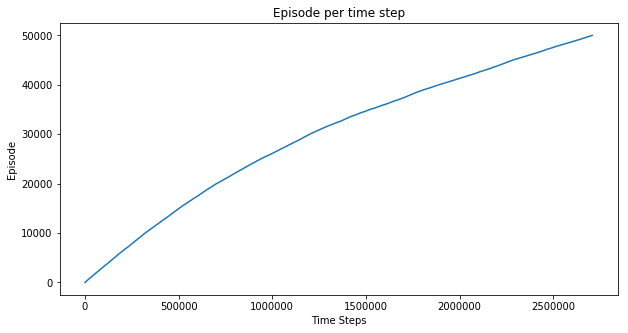

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [79]:
plotting.plot_episode_stats(stats)

In [14]:
"""Evaluate agent's performance after SARSA"""

total_epochs, total_penalties = 0, 0
episodes = 100

total_reward = 0

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        total_reward += reward

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    clear_output(wait=True)
    print(f"Episode: {_}")
    
print(f"Results after {episodes} episodes:")
print(f"Percent of successful paths: {(total_reward / episodes) * 100}")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

IndexError: arrays used as indices must be of integer (or boolean) type

## Deep-Q-Learning

In [2]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.regularizers import l2
import gym
import numpy as np
import random
import plotting
import time
from IPython import display

env = gym.make("Taxi-v2").env

inputs = Input(shape=(1,))
x = Dense(256, activation='relu', kernel_initializer = 'random_uniform')(inputs)
x = Dense(256, activation='relu', kernel_initializer = 'random_uniform')(x)
predictions = Dense(env.action_space.n, activation='linear', kernel_initializer = 'random_uniform')(x)

model = Model(inputs, predictions)
model.compile(optimizer = Adam(lr=0.001), loss = 'mse')

actions = np.array([a for a in range(env.action_space.n)])
# Hyperparameters
alpha, alpha_in = 0.4, 0.4
gamma = 0.99
epsilon, epsilon_in = 0.99, 0.99
episodes = 250

# For plotting metrics
all_epochs = []
all_penalties = []


stats = plotting.EpisodeStats(
        episode_lengths=np.array([0]),
        episode_rewards=np.array([0]))

model.reset_states()
x_batch = np.array([])
y_batch = np.array([])
episodes_batch = []

for i in range(episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    reward_per_episodio = 0

    while not done:
        
        old_values = model.predict([int(state)]).squeeze()
        best_actions = ((old_values) == np.max(old_values)).squeeze()
        

        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.random.choice(actions[best_actions]) # Exploit learned values          
            

        next_state, reward, done, info = env.step(action)
        reward_per_episodio += reward

        old_value = old_values[action]
        next_max = np.max(model.predict([int(next_state)]).squeeze())

        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        old_values[action] = new_value
        

        if len(x_batch) == 0:
            x_batch = np.array([int(state)])
            y_batch = np.array([old_values])
        else:
            x_batch = np.append(x_batch, [int(state)], axis=0)
            y_batch = np.append(y_batch, [old_values], axis=0)


        if reward == -10:
            penalties += 1
        
        last_state = state

        state = next_state
        epochs += 1


    stats = stats._replace(episode_lengths = np.append(stats.episode_lengths, np.array([0])))
    stats = stats._replace(episode_rewards = np.append(stats.episode_rewards, np.array([0])))
    episodes_batch.append([x_batch.copy(), y_batch.copy(), stats.episode_rewards[i]])
    x_batch = np.array([])
    y_batch = np.array([])
    
    #successive calls to fit will incrementally train the model

    if (i+1) % 10 == 0:
        rewards = list(map(lambda s: s[2], episodes_batch))
        tmp = list(map(lambda x: x[0], list(filter(lambda x: x[2] >= np.percentile(rewards, 60), episodes_batch))))
        x = np.concatenate(tmp)
        tmp = list(map(lambda x: x[1], list(filter(lambda x: x[2] >= np.percentile(rewards, 60), episodes_batch))))
        y = np.concatenate(tmp)
        model.fit(x = x.reshape(-1,1), y = y.reshape(-1,6), batch_size = 64, epochs = 20, verbose = 0)
        episodes_batch = []
        epsilon -= 0.15
        if epsilon < 0.1:
            epsilon = 0.1

    if i % 1 == 0:
        display.clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")

    if i % 100 == 0:
        alpha *= alpha_in


print("Training finished.\n")

Episode: 19
Alpha: 0.16000000000000003
epsilon: 0.69
gamma: 0.99


KeyboardInterrupt: 

In [3]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.regularizers import l2
import gym
import numpy as np
import random
import plotting
import time
from IPython import display

env = gym.make("CartPole-v1").env

inputs = Input(shape=(env.observation_space.shape[0],))
x = Dense(128, activation='relu', kernel_initializer = 'random_uniform')(inputs)
x = Dense(128, activation='relu', kernel_initializer = 'random_uniform')(x)
x = Dense(128, activation='relu', kernel_initializer = 'random_uniform')(x)
predictions = Dense(env.action_space.n, activation='linear', kernel_initializer = 'random_uniform')(x)

model = Model(inputs, predictions)
model.compile(optimizer = Adam(lr=0.01), loss = 'mse')

actions = np.array([a for a in range(env.action_space.n)])
# Hyperparameters
alpha, alpha_in = 0.4, 0.4
gamma = 0.99
epsilon, epsilon_in = 0.3, 0.3
episodes = 1000000

# For plotting metrics
all_epochs = []
all_penalties = []

stats = plotting.EpisodeStats(
        episode_lengths=np.array([0]),
        episode_rewards=np.array([0]))

model.reset_states()
x_batch = np.array([])
y_batch = np.array([])
episodes_batch = []

for i in range(episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        
        old_values = model.predict(state.reshape(-1,4)).squeeze()
        best_actions = ((old_values) == np.max(old_values)).squeeze()
        

        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.random.choice(actions[best_actions]) # Exploit learned values          
            

        next_state, reward, done, info = env.step(action)
        old_value = old_values[action]
        next_max = np.max(model.predict(next_state.reshape(-1,4)).squeeze())

        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        old_values[action] = new_value
        

        if len(x_batch) == 0:
            x_batch = np.array(state)
            y_batch = np.array([old_values])
        else:
            x_batch = np.append(x_batch, state, axis=0)
            y_batch = np.append(y_batch, [old_values], axis=0)


        if reward == -10:
            penalties += 1
        
        state = next_state
        epochs += 1
    
    stats = stats._replace(episode_lengths = np.append(stats.episode_lengths, np.array([0])))
    stats = stats._replace(episode_rewards = np.append(stats.episode_rewards, np.array([0])))
    episodes_batch.append([x_batch.copy(), y_batch.copy(), stats.episode_rewards[i]])
    x_batch = np.array([])
    y_batch = np.array([])
    #successive calls to fit will incrementally train the model

    if (i+1) % 100 == 0:
        rewards = list(map(lambda s: s[2], episodes_batch))
        tmp = list(map(lambda x: x[0], list(filter(lambda x: x[2] >= np.percentile(rewards, 80), episodes_batch))))
        x = np.concatenate(tmp)
        tmp = list(map(lambda x: x[1], list(filter(lambda x: x[2] >= np.percentile(rewards, 80), episodes_batch))))
        y = np.concatenate(tmp)
        model.fit(x = x.reshape(-1,env.observation_space.shape[0]), y = y.reshape(-1,2), batch_size = 64, epochs = 20, verbose = 0)
        episodes_batch = []

    if i > 100 and i % 10 == 0:
        display.clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        mean = np.mean(stats.episode_rewards[i-100:i])
        print("mean reward: {}".format(mean))
        if mean >= 195:
            print("solved")
            break

    if i % 1000 == 0:
        if alpha > 0.005:
            alpha *= alpha_in
        if epsilon > 0.1:
            epsilon *= epsilon_in


print("Training finished.\n")

Episode: 5720
Alpha: 0.0040960000000000015
epsilon: 0.09
gamma: 0.99
mean reward: 35.21


KeyboardInterrupt: 

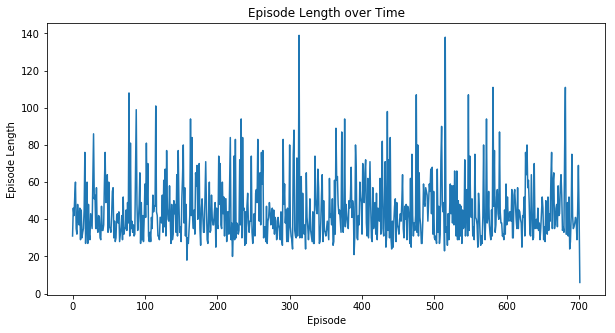

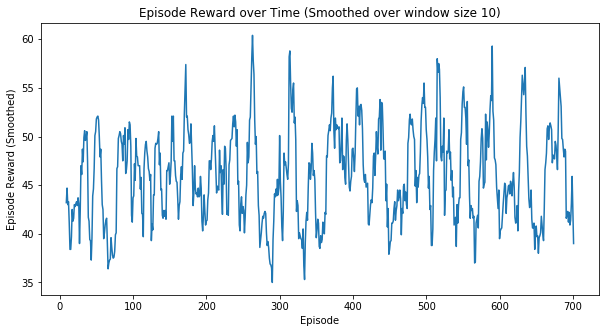

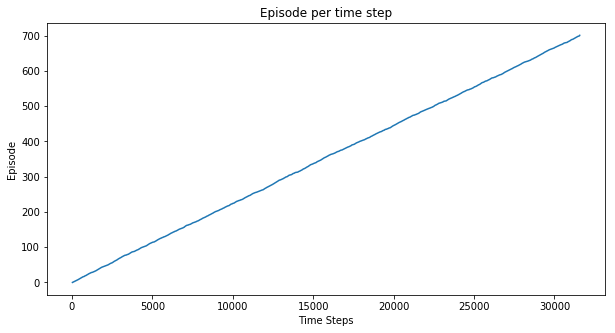

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [8]:
plotting.plot_episode_stats(stats)

# Policy Gradient Methods

## Reinforce

In [ ]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.regularizers import l2
import gym
import numpy as np
import random
import keras.backend as K
from keras.layers.core import Lambda
import plotting

EPISODES_TO_TRAIN = 5
TOTAL_EPISODES = 10000
ENTROPY_BETA = 0.01

env = gym.make("CartPole-v1").env

def custom_loss(batch_scales, batch_states):

    def loss(y_true, y_pred):
        log_prob = K.log(y_pred)[:len(batch_states),:]
        entropy = -K.mean(K.sum(y_pred * log_prob, axis = 1))
        entropy_loss = -ENTROPY_BETA * entropy
        argmax_flat = K.argmax(y_true, axis=1) + [env.action_space.n * _ for _ in range(len(batch_states))]
        log_prob = K.reshape(log_prob, (env.action_space.n*len(batch_states),))
        log_prob = K.gather(log_prob,argmax_flat)
        log_prob_action = K.cast(batch_scales, K.floatx()) * log_prob
        return -K.mean(log_prob_action) + entropy_loss

    return loss

def calc_qvals(rewards, gamma, discounted_reward, step_idx):
    res = []
    sum_r = 0.0
    for r in reversed(rewards):
        sum_r *= gamma
        sum_r += r
        res.append(sum_r)
    res = list(reversed(res))
    step_idx = (step_idx - len(res)) + 1
    for i in range(len(res)):
        discounted_reward += res[i]
        baseline = discounted_reward / step_idx
        step_idx += 1
        res[i] -= baseline
    return res, discounted_reward


inputs = Input(shape=(env.observation_space.shape[0],))
x = Dense(128, activation='relu')(inputs)
predictions = Dense(env.action_space.n, activation='softmax')(x)

model = Model(inputs, predictions)

total_rewards = []
step_idx = 0
done_episodes = 0

batch_episodes = 0
batch_states, batch_actions, batch_scales = [], [], []
cur_rewards = []
gamma = 0.99

stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(TOTAL_EPISODES),
        episode_rewards=np.zeros(TOTAL_EPISODES))

model.reset_states()
discounted_reward = 0
step_idx = 0
for i in range(1, TOTAL_EPISODES):

    state = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:

        step_idx += 1
        action = np.random.choice([a for a in range(env.action_space.n)], p=model.predict(state.reshape(-1,env.observation_space.shape[0])).squeeze())
        next_state, reward, done, info = env.step(action)
        batch_states.append(state)
        batch_actions.append(action)

        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs


        cur_rewards.append(reward)
        state = next_state
        epochs += 1

    if i % 100 == 0:
        print("episode", i)

    res, discounted_reward = calc_qvals(cur_rewards, gamma, discounted_reward, step_idx)
    batch_scales.extend(res)
    cur_rewards.clear()
    batch_episodes += 1

    if i > 100 and i % 10 == 0:
        print("mean last 100: ", np.mean(stats.episode_rewards[i-100:i]))
        if np.mean(stats.episode_rewards[i-100:i]) >= 195:
            print("solved")
            break

    if batch_episodes < EPISODES_TO_TRAIN:
        continue

    y = np_utils.to_categorical(batch_actions, env.action_space.n)
    model.compile(optimizer = Adam(lr=0.001), loss = custom_loss(batch_scales, batch_states))
    model.fit(x=np.array(batch_states).reshape(-1,env.observation_space.shape[0]), y= np.array(y).reshape(-1,env.action_space.n), batch_size=len(batch_states), epochs=3, verbose = 0)
    batch_episodes = 0
    batch_states.clear()
    batch_actions.clear()
    batch_scales.clear()


## A2C

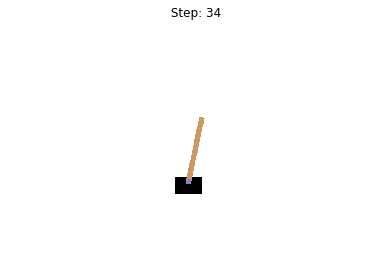

episode 3050 mean last 100:  41.88


KeyboardInterrupt: 

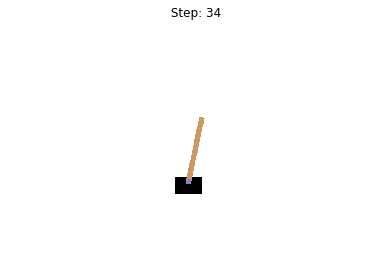

In [4]:
#xvfb-run -s "-screen 0 1400x900x24" jupyter notebook

from keras.layers import Dense, Input
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.regularizers import l2
import gym
import numpy as np
import random
import keras.backend as K
from keras.layers.core import Lambda
import plotting
import collections, copy
import os

GAMMA = 0.99
LEARNING_RATE = 0.001
ENTROPY_BETA = 0.01
BATCH_SIZE = 256
NUM_ENVS = 50

REWARD_STEPS = 50
CLIP_GRAD = 0.1

NUM_STOP = 2


env = gym.make("CartPole-v1").env

def policy_loss(adv, batch_states):

    def loss(y_true, y_pred):
        log_prob = K.log(y_pred)[:len(batch_states),:]
        entropy = -K.mean(K.sum(y_pred * log_prob, axis = 1))
        entropy_loss = -ENTROPY_BETA * entropy
        argmax_flat = K.argmax(y_true, axis=1) + [env.action_space.n * _ for _ in range(len(batch_states))]
        log_prob = K.reshape(log_prob, (env.action_space.n*len(batch_states),))
        log_prob = K.gather(log_prob,argmax_flat)
        log_prob_action = K.cast(adv, K.floatx()) * log_prob
        return -K.mean(log_prob_action) + entropy_loss

    return loss


def unroll_bellman(rewards):
    sum_r = 0.0
    while not len(rewards) == 0:
        sum_r *= GAMMA
        sum_r += rewards.popleft()
    return sum_r

def check_if_solved(episodes, episodes_rewards, solving_mean, env):
    solved = False
    if episodes > 100 and episodes % 50 == 0:
        print("episode " + str(episodes) + " mean last 100: ", np.mean(episodes_rewards[episodes-100:episodes]))
        if np.mean(episodes_rewards[episodes-100:episodes]) >= solving_mean:
            solved = True
            print("solved")
    return solved


if os.path.isfile('./A2C/actor_model.h5'):
    actor_model = load_model('./A2C/actor_model.h5')
else:
    actor_inputs = Input(shape=(env.observation_space.shape[0],))
    x = Dense(128, activation='relu')(actor_inputs)
    actor_outputs = Dense(env.action_space.n, activation='softmax')(x)
    actor_model = Model(actor_inputs, actor_outputs)

if os.path.isfile('./A2C/critic_model.h5'):
    actor_model = load_model('./A2C/critic_model.h5')
else:
    critic_inputs = Input(shape=(env.observation_space.shape[0],))
    x = Dense(128, activation='relu')(critic_inputs)
    critic_outputs = Dense(1, activation='linear')(x)
    critic_model = Model(critic_inputs, critic_outputs)
    actorcritic_model.compile(optimizer = Adam(lr=0.001), loss = "mse")



step_idx = 0
done_episodes = 0
batch_states, batch_actions, adv, not_done_idx, last_states = [], [], [], [], []
discounted_rewards = []

stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(10000),
        episode_rewards=np.zeros(10000))

critic_model.reset_states()
actor_model.reset_states()
last_rewards = collections.deque()
solved = False
episodes = 0

state = env.reset()
epochs, reward, = 0, 0
done = False
show = False

while not solved:

    for i in range(BATCH_SIZE):
        if show:
            show_state(env, step_idx)

        #choosing action according to probability distribution
        action = np.random.choice([a for a in range(env.action_space.n)], \
                                    p=actor_model.predict(state.reshape(-1,env.observation_space.shape[0])).squeeze())
        next_state, reward, done, info = env.step(action)
        batch_states.append(state)
        batch_actions.append(action)
        last_rewards.append(reward)

        stats.episode_rewards[episodes] += reward
        stats.episode_lengths[episodes] = step_idx

        #if we have enough steps to unroll the bellman equation
        if step_idx > REWARD_STEPS:
            discounted_rewards.append(unroll_bellman(copy.copy(last_rewards)))
            last_rewards.popleft()

        step_idx += 1

        #identifying states for which we need to add the value funcion
        if not done and i not in [BATCH_SIZE - i for i in range(1,REWARD_STEPS)]:
            not_done_idx.append(i)
            last_states.append(np.array(state, copy=False))
        elif done:
            show = False
            #if the episode has ended we need to remove the final states b\c they don't need the bellman approximation
            if len(not_done_idx) > REWARD_STEPS:
                not_done_idx = not_done_idx[:len(not_done_idx) - REWARD_STEPS]
                last_states = last_states[:len(last_states) - REWARD_STEPS]
            else:
                not_done_idx = []
                last_states = []
            state = env.reset()
            step_idx = 0
            episodes += 1
            solved = check_if_solved(episodes, stats.episode_rewards, 195, env)
            if episodes % 300 == 0:
                show = True
            while not len(last_rewards) == 0:
                discounted_rewards.append(unroll_bellman(copy.copy(last_rewards)))
                last_rewards.popleft()

        #update the state
        state = next_state

    epochs += 1
    exceeding_rewards = discounted_rewards[BATCH_SIZE:]
    discounted_rewards = discounted_rewards[:BATCH_SIZE]
    rewards_np = np.array(discounted_rewards, dtype=np.float32)
    
    if not_done_idx:
        last_vals = critic_model.predict(np.array(last_states).reshape(-1,env.observation_space.shape[0]))
        rewards_np[not_done_idx] += GAMMA ** REWARD_STEPS * last_vals.squeeze()

    states = batch_states[:len(discounted_rewards)]
    actions = batch_actions[:len(discounted_rewards)]
    batch_states = batch_states[len(discounted_rewards):]
    batch_actions = batch_actions[len(discounted_rewards):]
    #putting the exceeding_rewards in the new batch
    discounted_rewards = exceeding_rewards

    critic_y = rewards_np.copy()
    adv = rewards_np - critic_model.predict(np.array(states).reshape(-1,env.observation_space.shape[0])).squeeze()
    critic_model.fit(x=np.array(states).reshape(-1,env.observation_space.shape[0]), y= critic_y.reshape(-1,1), \
                                                batch_size=BATCH_SIZE, epochs=1, verbose = 0)

    actor_y = np_utils.to_categorical(actions, env.action_space.n)
    actor_model.compile(optimizer = Adam(lr=0.001), loss = policy_loss(adv, states))
    actor_model.fit(x=np.array(states).reshape(-1,env.observation_space.shape[0]),\
                                        y= np.array(actor_y).reshape(-1,env.action_space.n), batch_size=BATCH_SIZE, epochs=1, verbose = 0)

    if episodes % 2000 == 0:
        actor_model.save("actor_model_A2C.h5")
        critic_model.save("critic_model_A2C.h5")
        

## A3C

In [ ]:
from A3C import A3C

CartPole = A3C("CartPole-v1",actor_batch_size = 64, num_threads=4, max_episodes_per_thread = 1000, episode_to_train=5)
CartPole.train()